In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax

### VGG16

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

In [18]:
image_size = [224,224]

train_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\train'
test_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\test'

In [19]:
vgg16 = VGG16(input_shape=image_size + [3] , weights='imagenet' , include_top = False)

In [20]:
for layers in vgg16.layers:
    layers.trainable=False

In [21]:
x = Flatten()(vgg16.output)

In [22]:
from glob import glob

In [23]:
a = glob('D:\\Finetuning techniques\\data\\archive\\Data\\train\\*')

In [24]:
len(a)

3

In [25]:
predict = Dense(len(a) , activation = 'softmax')(x)

In [26]:
model = Model(inputs = vgg16.inputs ,outputs = predict)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [30]:
train_generator = generator.flow_from_directory (
    train_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [31]:
test_generator = generator.flow_from_directory (
    test_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [33]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [36]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [37]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=10, callbacks=[stop])

C:\Users\korla\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 797s 5s/step - loss: 0.3191 - accuracy: 0.8839 - val_loss: 0.2042 - val_accuracy: 0.9185
Epoch 2/10
161/161 [==============================] - 3104s 19s/step - loss: 0.1644 - accuracy: 0.9421 - val_loss: 0.1374 - val_accuracy: 0.9464
Epoch 3/10
161/161 [==============================] - 760s 5s/step - loss: 0.1350 - accuracy: 0.9522 - val_loss: 0.1588 - val_accuracy: 0.9363
Epoch 4/10
161/161 [==============================] - 768s 5s/step - loss: 0.1199 - accuracy: 0.9553 - val_loss: 0.1369 - val_accuracy: 0.9464
Epoch 5/10
161/161 [==============================] - 978s 6s/step - loss: 0.1377 - accuracy: 0.9514 - val_loss: 0.1968 - val_accuracy: 0.9340
Epoch 6/10
161/161 [==============================] - 1217s 8s/step - loss: 0.1011 - accuracy: 0.9668 - val_loss: 0.1687 - val_accuracy: 0.9363
Epoch 7/10
161/161 [==============================] - 1053s 7s/step - loss: 0.1212 - accuracy: 0.9561 - val_loss: 0.1364 - val_accuracy: 0.

In [38]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
train_loss = model.history.history['loss']
train_loss

[0.3191224932670593,
 0.16435666382312775,
 0.1349695324897766,
 0.11991001665592194,
 0.13765551149845123,
 0.10110253095626831,
 0.12118760496377945,
 0.11561772227287292,
 0.10992599278688431,
 0.11008906364440918]

In [40]:
test_loss = model.history.history['val_loss']
test_loss

[0.20418427884578705,
 0.13740921020507812,
 0.15875893831253052,
 0.13694438338279724,
 0.1967664510011673,
 0.16872210800647736,
 0.13635337352752686,
 0.17740461230278015,
 0.1431664377450943,
 0.12498614192008972]

In [41]:
train_acc = model.history.history['accuracy']
train_acc

[0.8839424848556519,
 0.9420684576034546,
 0.9521772861480713,
 0.9552876949310303,
 0.9513996839523315,
 0.9667574167251587,
 0.95606529712677,
 0.9607309699058533,
 0.9617029428482056,
 0.9582037329673767]

In [42]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.91847825050354,
 0.9464285969734192,
 0.9363353848457336,
 0.9464285969734192,
 0.9340062141418457,
 0.9363353848457336,
 0.9479813575744629,
 0.9386646151542664,
 0.9409937858581543,
 0.9596273303031921]

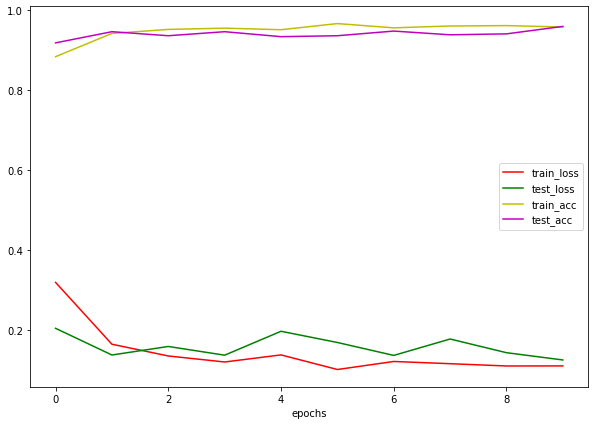

In [44]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(10),train_loss,color='r',label='train_loss')
plt.plot(np.arange(10),test_loss,color='g',label='test_loss')
plt.plot(np.arange(10),train_acc,color='y',label='train_acc')
plt.plot(np.arange(10),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

### Validation Report 

In [46]:
loss, acc = model.evaluate(test_generator)

41/41 [==============================] - 160s 4s/step - loss: 0.1212 - accuracy: 0.9526


In [47]:
print(loss)
print(acc)

0.12122727930545807
0.9526397585868835


In [48]:
y_test_pred_2 = model.predict(test_generator)

In [49]:
y_test_pred_2

array([[9.9772900e-01, 1.3354475e-03, 9.3556894e-04],
       [9.9999332e-01, 3.8543778e-08, 6.6209736e-06],
       [9.9924123e-01, 1.1625326e-05, 7.4714160e-04],
       ...,
       [1.3969158e-04, 3.0230597e-01, 6.9755429e-01],
       [5.5676064e-06, 7.0042470e-03, 9.9299014e-01],
       [1.4308386e-06, 5.2419171e-04, 9.9947435e-01]], dtype=float32)

In [50]:
y_test_pred_2 = np.argmax(y_test_pred_2,axis = 1)

In [51]:
len(y_test_pred_2)

1288

In [52]:
len(test_generator.classes)

1288

In [53]:
y_test_pred_2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
test_generator.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [59]:
accuracy_score(test_generator.classes,y_test_pred_2)

0.9503105590062112

In [60]:
confusion_matrix(test_generator.classes,y_test_pred_2)

array([[115,   0,   1],
       [  0, 294,  23],
       [  2,  38, 815]], dtype=int64)

In [61]:
print(classification_report(test_generator.classes,y_test_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       116
           1       0.89      0.93      0.91       317
           2       0.97      0.95      0.96       855

    accuracy                           0.95      1288
   macro avg       0.95      0.96      0.95      1288
weighted avg       0.95      0.95      0.95      1288



In [62]:
import cv2

In [63]:
labels = ['covid','normal','phenomia']

In [64]:
from tensorflow.keras.preprocessing import image

In [65]:
def fun(path):
    
    img = cv2.imread(path)
    im_resize = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))
    
    image_pred = image.load_img(path,target_size=(224,224))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis = 0)
    
    result = model.predict(a)
    print(result)
    
    q = np.argmax(result,axis = 1)
    print(q)
    print(labels[q[0]])
    
    

[[1. 0. 0.]]
[0]
covid


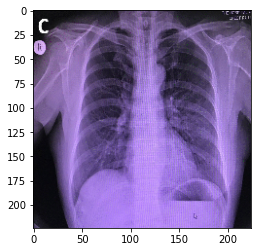

In [66]:
fun('D:\\Finetuning techniques\\data\\archive\\Data\\test\\COVID19\\20.jpg')

[[0. 0. 1.]]
[2]
phenomia


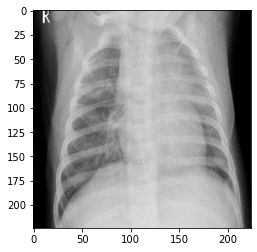

In [68]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\PNEUMONIA\\2.jpg")

[[0. 0. 1.]]
[2]
phenomia


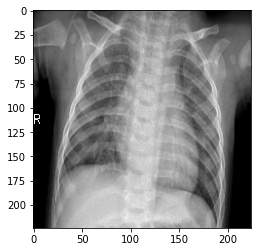

In [161]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\PNEUMONIA\\3.jpg")

[[8.6456525e-01 1.3543475e-01 3.4849072e-31]]
[0]
covid


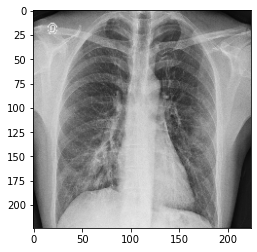

In [163]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\COVID19\\4.jpg")

[[0. 1. 0.]]
[1]
normal


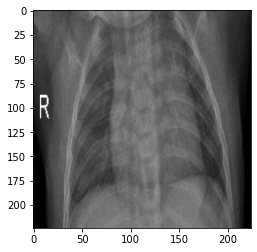

In [74]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\train\\Normal\\2.jpg")